# Clustering Algorithm Comparison

Here we focus on the clustering algorithms which we don't need to predetermine the number of clusters: **(1) DBSCAN and (2) Affinity Propagation**.

In [42]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN

plt.style.use('ggplot')
%matplotlib inline

In [95]:
X_moon,  label_moon = make_moons(n_samples=200, noise=0.1, random_state=19)
X_blobs, label_blobs = make_blobs(n_samples=200, random_state=8)
X_circles, label_circles = make_circles(n_samples = 600, factor=.5, noise=.05)
X_uniform, label_uniform = np.random.rand(400, 2), None

In [87]:
def scatterPlot(X_moon, X_blobs, X_circles, X_uniform, z1, z2, z3, z4):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12,10))
    ax = plt.subplot(221)
    ax.scatter(X_moon[:, 0], X_moon[:, 1], s=140, c=z1, alpha=0.9, cmap=plt.cm.Set1)
    ax = plt.subplot(222)
    ax.scatter(X_blobs[:, 0], X_blobs[:, 1], s=140, c=z2, alpha=0.9, cmap=plt.cm.Set1)
    ax = plt.subplot(223)
    ax.scatter(X_circles[:, 0], X_circles[:, 1], s=140, c=z3, alpha=0.9, cmap=plt.cm.Set1)
    ax = plt.subplot(224)
    ax.scatter(X_uniform[:, 0], X_uniform[:, 1], s=140, c=z4, alpha=0.9, cmap=plt.cm.Set1)
    fig.tight_layout()
    fig.show()

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


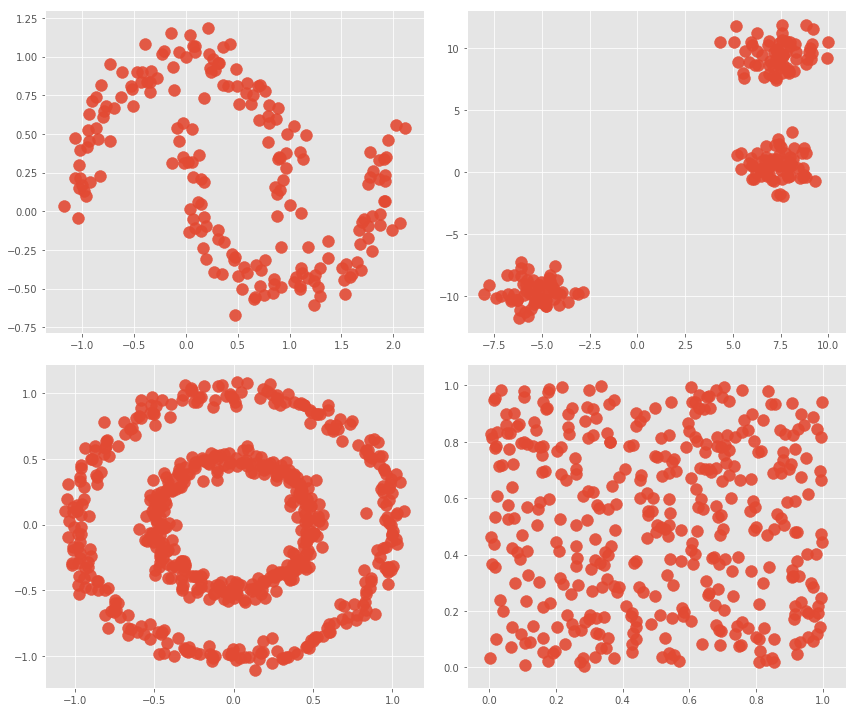

In [96]:
scatterPlot(X_moon, X_blobs, X_circles, X_uniform, None, None, None, None)

## 1. DBSCAN

* Two paramters: **eps** is the radius and **min_samples** is the minumum number of points nearby to define a core.
* Pros:  No need to predetermine value of k.
* Cons: In a high-dimenional space we may incorrectly cluster the data points which have similar spatial distances but are very different (dimensionality curse).

In [124]:
z_moon = DBSCAN(eps=0.25, min_samples=12).fit(X_moon).labels_
z_blobs = DBSCAN(eps=1, min_samples=3).fit(X_blobs).labels_
z_circles = DBSCAN(eps=0.25, min_samples=4).fit(X_circles).labels_
z_uniform = DBSCAN(eps=0.5, min_samples=4).fit(X_uniform).labels_

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


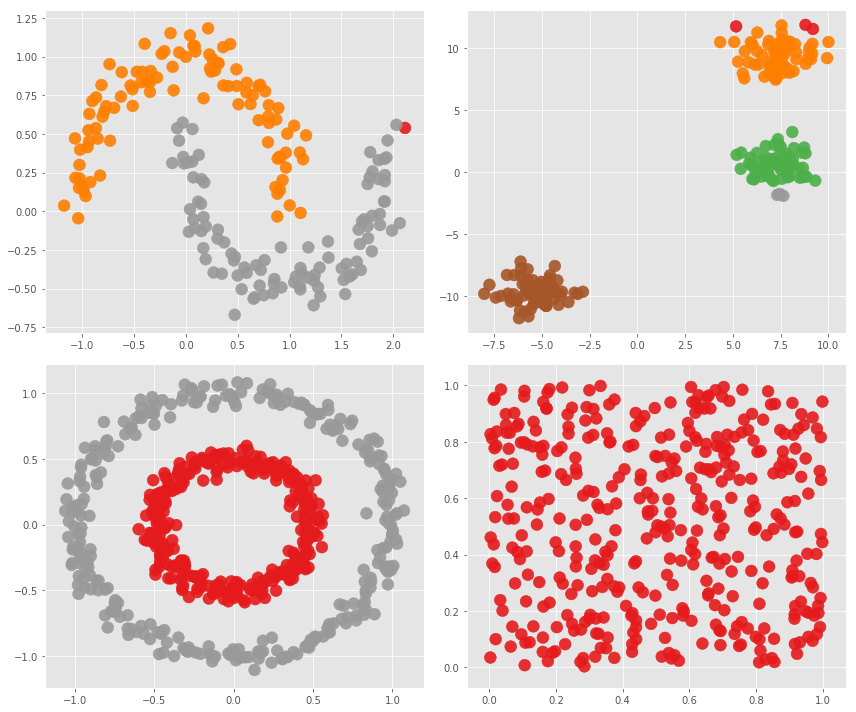

In [125]:
scatterPlot(X_moon, X_blobs, X_circles, X_uniform, z_moon, z_blobs, z_circles, z_uniform)

One of disadvantages for DBSCAN is that it is sensitive to the selection on parameters. With incorrectly inputing the parameters, the clustering will lead to wrong outcomes:

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


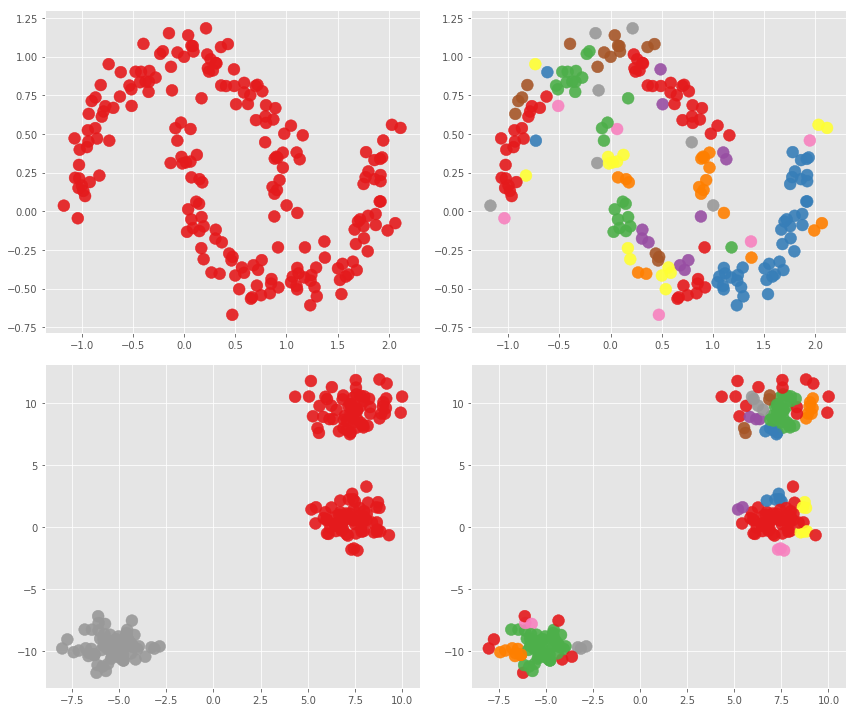

In [138]:
z_1 = DBSCAN(eps=0.3, min_samples=12).fit(X_moon).labels_
z_2 = DBSCAN(eps=0.1, min_samples=1).fit(X_moon).labels_
z_3 = DBSCAN(eps=5, min_samples=12).fit(X_blobs).labels_
z_4 = DBSCAN(eps=0.5, min_samples=2).fit(X_blobs).labels_
scatterPlot(X_moon, X_moon, X_blobs, X_blobs, z_1, z_2, z_3, z_4)

## 2. Affinity Progagation

In [29]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False).fit(X)

In [127]:
z_moon = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15).fit(X_moon).labels_
z_blobs = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15).fit(X_blobs).labels_
z_circles = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15).fit(X_circles).labels_
z_uniform = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15).fit(X_uniform).labels_

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


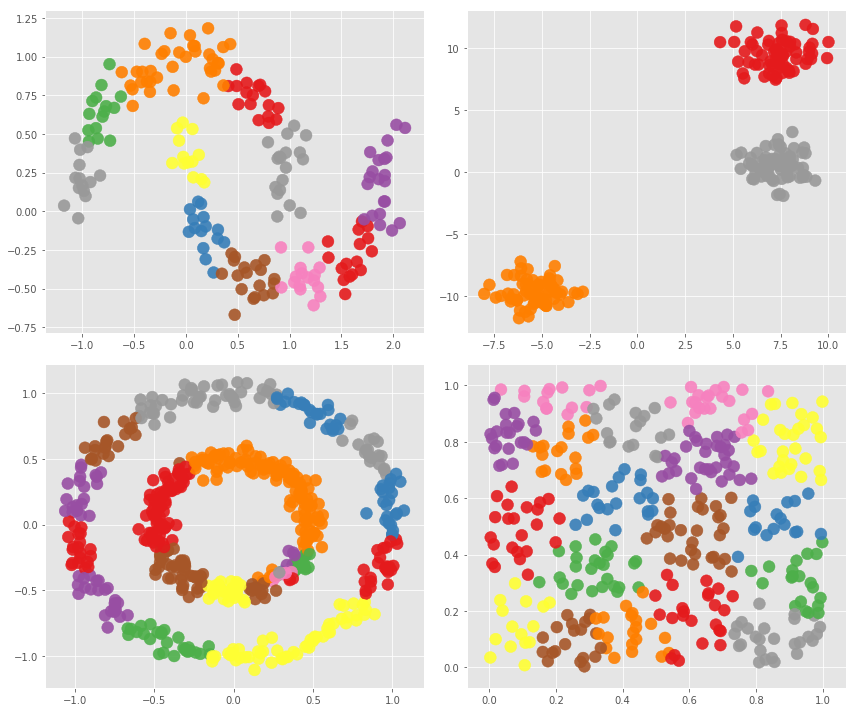

In [128]:
scatterPlot(X_moon, X_blobs, X_circles, X_uniform, z_moon, z_blobs, z_circles, z_uniform)

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


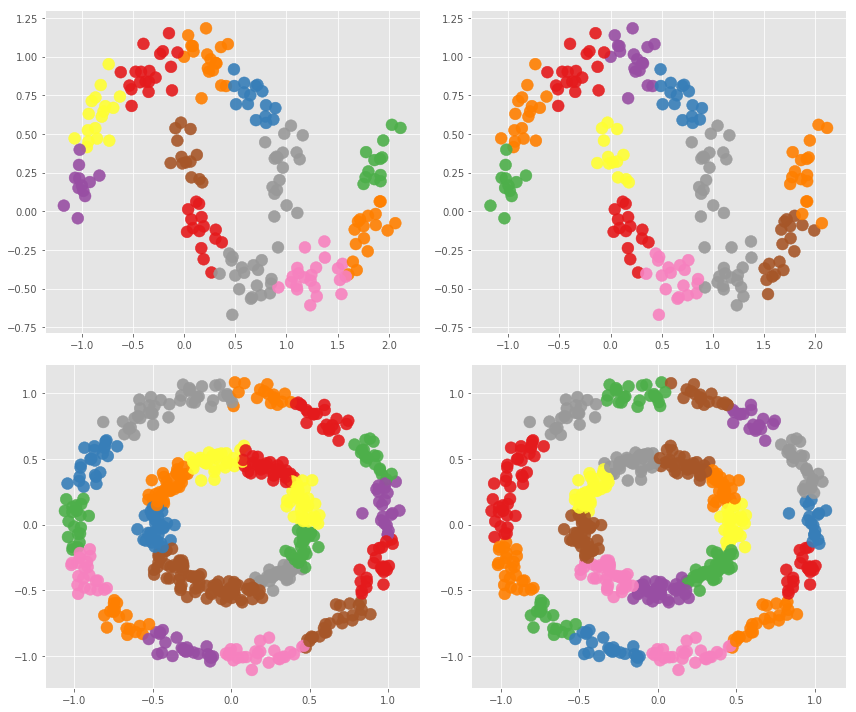

In [141]:
z_1 = AffinityPropagation(damping=0.6, max_iter=200, convergence_iter=15).fit(X_moon).labels_
z_2 = AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15).fit(X_moon).labels_
z_3 = AffinityPropagation(damping=0.6, max_iter=200, convergence_iter=15).fit(X_circles).labels_
z_4 = AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15).fit(X_circles).labels_
scatterPlot(X_moon, X_moon, X_circles, X_circles, z_1, z_2, z_3, z_4)